# Viz HiC interactions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools
import matplotlib.colors
import cooler
from matplotlib.colors import LogNorm

In [8]:
# giraffe T2T data
hap='_pat'
asmName="giraffev0.1.1"

# privious refereence
# hap = ''
# asmName = "GCA_017591445.1"

# prefix
prefix="_hicRefSeqData"

# final prefix 
asm=f"{asmName}{hap}{prefix}"

index='X'
if hap == '_pat':
    index = 'Y'

print(f"asm: {asm}, hap: {hap}")

asm: GCA_017591445.1_hicRefSeqData, hap: 


In [9]:
file = f"/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/hic/{asm}.1000000.mcool::resolutions/1000000"
# file = f"/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/hic/GCA_017591445.1.1000000.mcool::resolutions/1000000"

In [10]:
clr = cooler.Cooler(file)
### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')
# chrom_start, chrom_end = clr.chromnames.index(f'chr1{hap}'), clr.chromnames.index(f'chr{index}{hap}')
chrom_start, chrom_end = 0, 14

chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chrX', 'JABCKX010000100.1', 'JABCKX010000993.1', 'JABCKX010000994.1', 'JABCKX010000995.1', 'JABCKX010000996.1', 'JABCKX010000997.1', 'JABCKX010000998.1', 'JABCKX010000999.1', 'JABCKX010001000.1', 'JABCKX010001001.1', 'JABCKX010001002.1', 'JABCKX010000101.1', 'JABCKX010001003.1', 'JABCKX010001004.1', 'JABCKX010001005.1', 'JABCKX010001006.1', 'JABCKX010001007.1', 'JABCKX010001008.1', 'JABCKX010001009.1', 'JABCKX010001010.1', 'JABCKX010001011.1', 'JABCKX010001012.1', 'JABCKX010000102.1', 'JABCKX010001013.1', 'JABCKX010001014.1', 'JABCKX010001015.1', 'JABCKX010001016.1', 'JABCKX010001017.1', 'JABCKX010001018.1', 'JABCKX010001019.1', 'JABCKX010001020.1', 'JABCKX010001021.1', 'JABCKX010001022.1', 'JABCKX010000103.1', 'JABCKX010001023.1', 'JABCKX010001024.1', 'JABCKX010001025.1', 'JABCKX010001026.1', 'JABCKX010001027.1', 'JABCKX010001028.1', 'JABCKX010001029.1', 

In [11]:
chromstarts = []
for i in clr.chromnames:
        chromstarts.append(clr.extent(i)[0])

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

start, end = chromstarts[chrom_start], chromstarts[chrom_end]

In [12]:
chr_detail = f'chr5{hap}'
detail_start, detail_end = 35_000_000, 105_000_000
v_max=500
v_max_count = 500
chr_detail

'chr5'

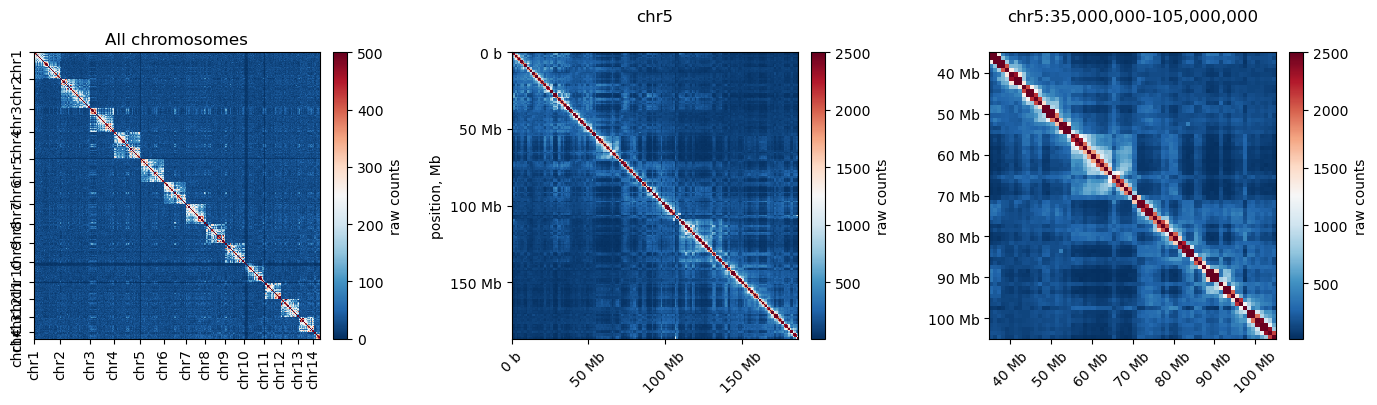

In [13]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

ax = axs[0]
# im = ax.matshow(clr.matrix(balance=False)[:], vmax=2500, cmap='RdBu_r');
im = ax.matshow(
    clr.matrix(balance=False)[start:end, start:end],
    vmax=v_max_count,cmap='RdBu_r')
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.set_yticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.xaxis.tick_bottom()
ax.set_title('All chromosomes')

ax = axs[1]
im = ax.matshow(
    clr.matrix(balance=False).fetch(chr_detail),
    vmax=2500,cmap='RdBu_r',
    extent=(0,clr.chromsizes[chr_detail], clr.chromsizes[chr_detail], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title(chr_detail, y=1.08)
ax.set_ylabel('position, Mb')
format_ticks(ax)

ax = axs[2]
# start, end = 30_000_000, 60_000_000
region = (chr_detail, detail_start, detail_end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    vmax=2500, cmap='RdBu_r',
    extent=(detail_start, detail_end, detail_end, detail_start)
);
ax.set_title(f'{chr_detail}:{detail_start:,}-{detail_end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

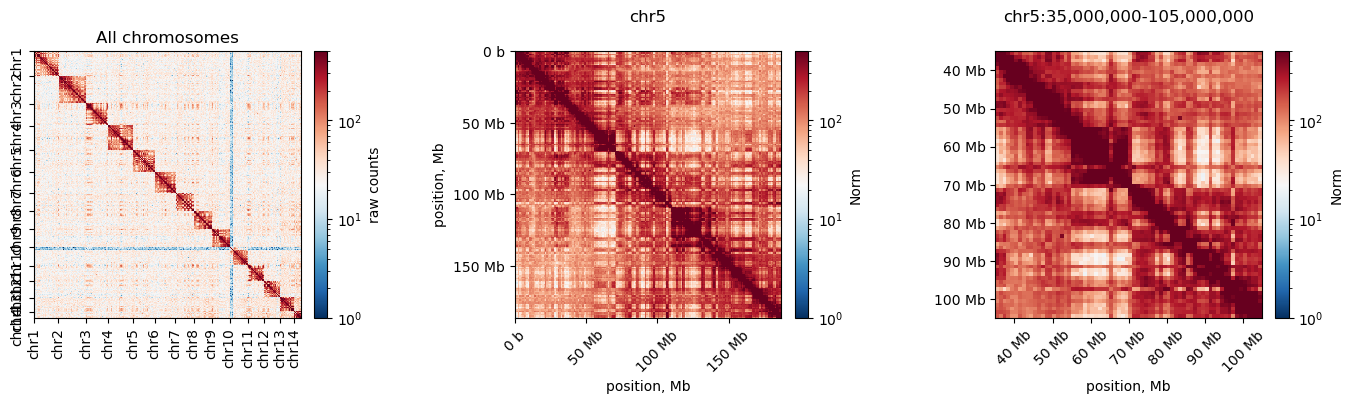

In [14]:


f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=v_max)

ax = axs[0]
# im = ax.matshow(clr.matrix(balance=False)[:],norm=norm,cmap='RdBu_r')
im = ax.matshow(clr.matrix(balance=False)[start:end, start:end], norm=norm, cmap='RdBu_r');
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.set_yticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.tick_params(axis='y', labelrotation=90)

ax.xaxis.tick_bottom()
ax.set_title('All chromosomes')

ax = axs[1]
im = ax.matshow(
    clr.matrix(balance=False).fetch(chr_detail),
    norm=norm,cmap='RdBu_r',
    extent=(0,clr.chromsizes[chr_detail], clr.chromsizes[chr_detail], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='Norm');
ax.set_title(chr_detail, y=1.08)
ax.set(ylabel='position, Mb', xlabel='position, Mb')
format_ticks(ax)

ax = axs[2]
# start, end = 30_000_000, 60_000_000
region = (chr_detail, detail_start, detail_end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    norm=norm, cmap='RdBu_r',
    extent=(detail_start, detail_end, detail_end, detail_start)
);
ax.set_title(f'{chr_detail}:{detail_start:,}-{detail_end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='Norm');
ax.set(xlabel='position, Mb')
format_ticks(ax)
plt.tight_layout()

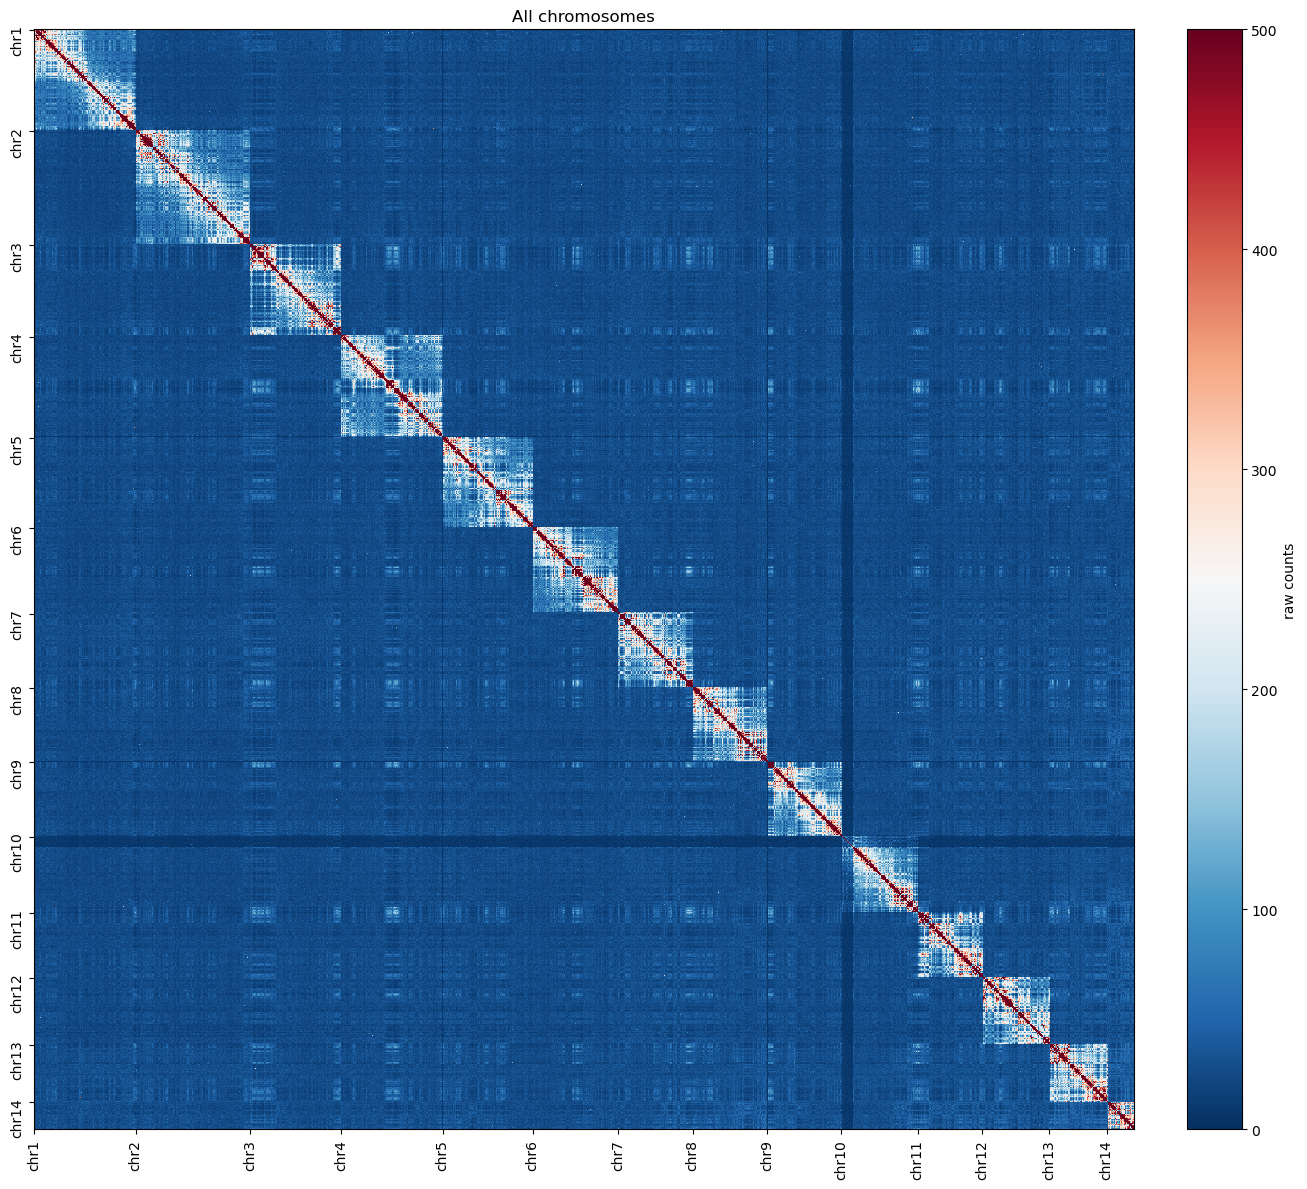

In [15]:
f, ax = plt.subplots(
    figsize=(14,12))
im = ax.matshow(clr.matrix(balance=False)[start:end, start:end],vmax=v_max_count,cmap='RdBu_r')
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end]) - start)
ax.set_xticklabels(clr.chromnames[chrom_start:chrom_end], rotation=90)

# ax.set(xticks=chromstarts, xticklabels=clr.chromnames[0:14],xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.set_yticks(np.array(chromstarts[chrom_start:chrom_end])-start, clr.chromnames[chrom_start:chrom_end], rotation=90);
ax.tick_params(axis='y', labelrotation=90)

ax.xaxis.tick_bottom()
ax.set_title('All chromosomes')
plt.tight_layout()

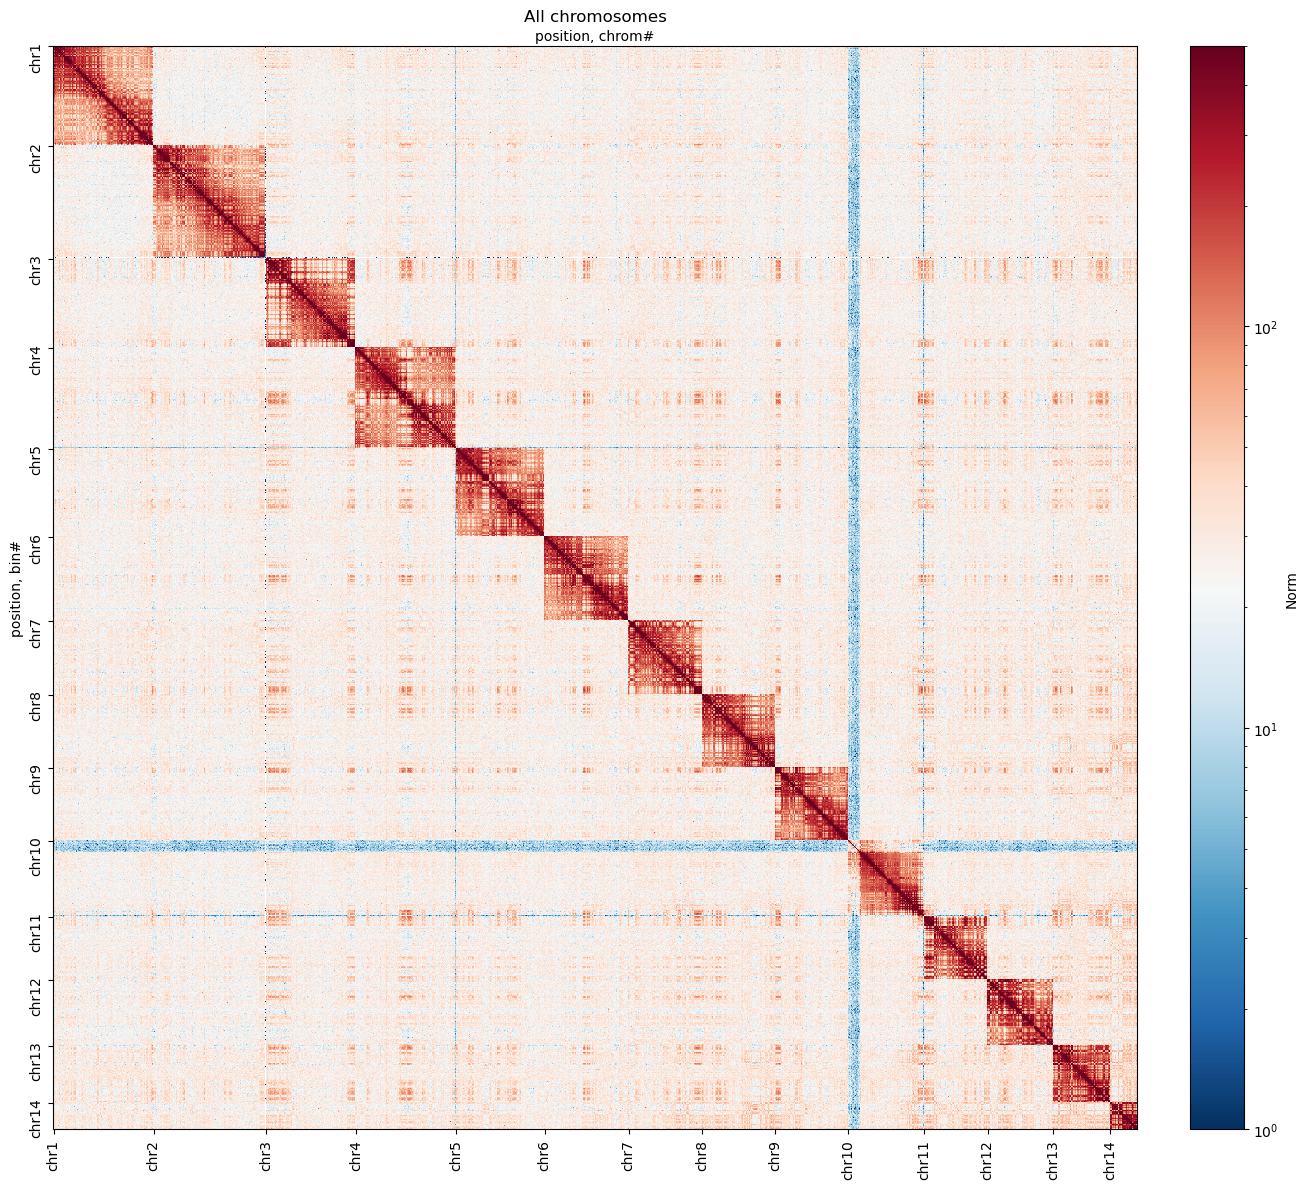

In [16]:
from matplotlib.colors import LogNorm

# Define the normalization using LogNorm
norm = LogNorm(vmax=v_max)  # Using 'norm' as the variable name instead of 'vnorm'

# Create the plot
f, ax = plt.subplots(figsize=(14, 12))

# Plot the matrix with the LogNorm normalization
im = ax.matshow(clr.matrix(balance=False)[start:end, start:end], norm=norm, cmap='RdBu_r')

# Add a colorbar with proper spacing and labeling
plt.colorbar(im, fraction=0.046, pad=0.04, label='Norm')

# Set X-ticks and labels
ax.set_xticks(np.array(chromstarts[chrom_start:chrom_end]) - start)
ax.set_xticklabels(clr.chromnames[chrom_start:chrom_end], rotation=90)

# Set Y-ticks and labels
ax.set_yticks(np.array(chromstarts[chrom_start:chrom_end]) - start)
ax.set_yticklabels(clr.chromnames[chrom_start:chrom_end])

# Add axis labels
ax.set_xlabel('position, chrom#')
ax.set_ylabel('position, bin#')
ax.xaxis.set_label_position('top')

# Configure tick positions
ax.tick_params(axis='y', labelrotation=90)
ax.xaxis.tick_bottom()

# Add a title
ax.set_title('All chromosomes')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()
